# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [9]:
# Import of Packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Importing Excel Data (General Format of Excel must be Headers followed by columns of Data)

In [10]:
# Reading the excel file
df = pd.read_excel("Sample.xlsx")
# Creating a Dictionary with the Headers as Keys and data as values in Lists
dictionary = df.to_dict(orient="list")

# Clearing all blank spaces in the names of the Keys (if deleted check plot section)
dictionary = {key.replace(" ", ""): value for key, value in dictionary.items()}

## Creating Scenarios
Calculation of Driftrate Mu and Standart Deviation Sigma


In [11]:
# Creating Series for Panda
Series = pd.Series(dictionary["PercentageChange.1"])

# Calculation of Drift rRate mu (Mean Value of Percentage Change)
dictionary["mu"] = float(Series.mean())
mu = dictionary["mu"]

# Calculation of Standart Deviation sigma
dictionary["sigma"] = float(Series.std())
sigma = dictionary["sigma"]

Creating a Defined Number of Forecasts and Plots them

In [12]:
# Required Parameters
# mu = 0.042754330256447565
# sigma = 0.05891802084811409
Dt0 = 22561132
t = 1
Fth = 50
Forecasts = 20

import Functions as fn

fn.Scenario_plot(fn.Scenario(mu, sigma, Dt0, t, Fth, Forecasts), Fth)
print(fn.Scenario(mu, sigma, Dt0, t, Fth, Forecasts), Fth)

## Old Version

In [13]:
"""# Creating Forecasts on Historic Basis
#Requried Parameters:
# Mean Percentage Growth mu
    #mu = 0.042754330256447565
# Standart Deviation of Percentage Growth
    #sigma = 0.05891802084811409
# Duration of Delta t
t = 1
#Initial Demand t0
Dt0 = (dictionary['Demand'][-1])
# Forecast time horizon
Fth = 50
# number of Forecasts (+1)
Forecasts = 5+1

S = list(range(1,Fth))
S2 = list(range(1,Forecasts))
randomrange = np.arange(-1, 1, 0.1)
Szenarios= []

for j in S2:
    D = [Dt0]
    for i in S:
        Szenario = D[i-1] + (D[i-1] * mu * t + D[i-1] * sigma * random.choice(randomrange) * math.sqrt(t))
        D.append(Szenario)
    Szenarios.append(D)


plotvector = list(range(1,(Fth+1)))

for scenario in Szenarios:
    plt.plot(plotvector, scenario, label='Scenario')

plt.grid(True)
plt.xlabel("Years")
plt.ylabel("Passenger Numbers")
plt.title("Demand Szenarios for Zurich Airport")
#plt.legend()  # Display legend
plt.figure()
"""

'# Creating Forecasts on Historic Basis\n#Requried Parameters:\n# Mean Percentage Growth mu\n    #mu = 0.042754330256447565\n# Standart Deviation of Percentage Growth\n    #sigma = 0.05891802084811409\n# Duration of Delta t\nt = 1\n#Initial Demand t0\nDt0 = (dictionary[\'Demand\'][-1])\n# Forecast time horizon\nFth = 50\n# number of Forecasts (+1)\nForecasts = 5+1\n\nS = list(range(1,Fth))\nS2 = list(range(1,Forecasts))\nrandomrange = np.arange(-1, 1, 0.1)\nSzenarios= []\n\nfor j in S2:\n    D = [Dt0]\n    for i in S:\n        Szenario = D[i-1] + (D[i-1] * mu * t + D[i-1] * sigma * random.choice(randomrange) * math.sqrt(t))\n        D.append(Szenario)\n    Szenarios.append(D)\n\n\nplotvector = list(range(1,(Fth+1)))\n\nfor scenario in Szenarios:\n    plt.plot(plotvector, scenario, label=\'Scenario\')\n\nplt.grid(True)\nplt.xlabel("Years")\nplt.ylabel("Passenger Numbers")\nplt.title("Demand Szenarios for Zurich Airport")\n#plt.legend()  # Display legend\nplt.figure()\n'

## Plotting
Plotting Excel Data (Specific to Sample Excel, all other Inputs need to be adjusted to it)

<Figure size 640x480 with 0 Axes>

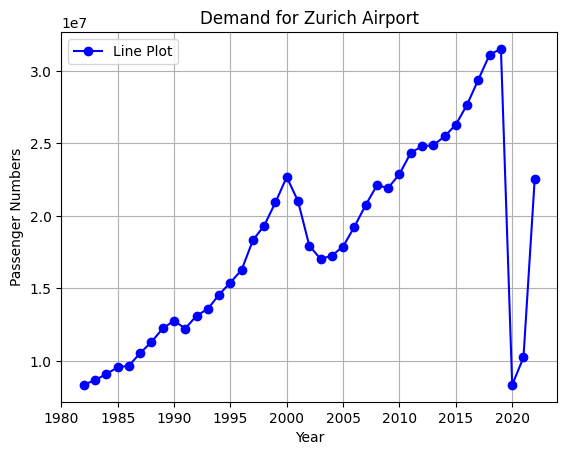

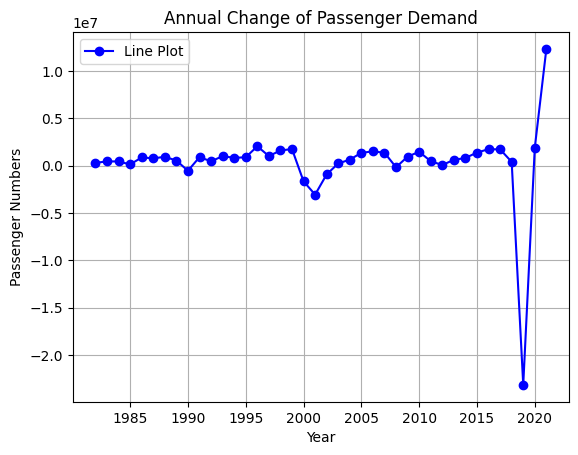

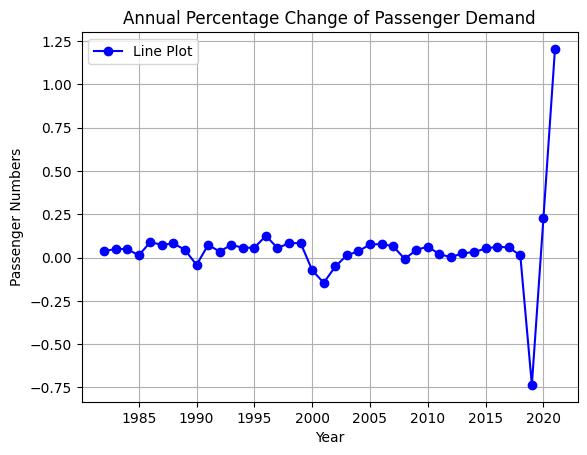

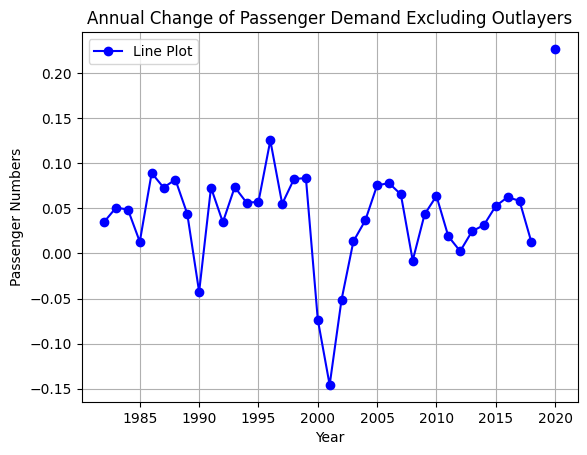

<Figure size 640x480 with 0 Axes>

In [14]:
# Plotting Excel Data (only specific to Test Excel, keys needs to be changed for other
# data)

plt.plot(
    dictionary["Year"],
    dictionary["Demand"],
    label="Line Plot",
    color="blue",
    marker="o",
)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Passenger Numbers")
plt.title("Demand for Zurich Airport")
plt.legend()  # Display legend
plt.figure()

plt.plot(
    dictionary["Year"],
    dictionary["AnnualChange"],
    label="Line Plot",
    color="blue",
    marker="o",
)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Passenger Numbers")
plt.title("Annual Change of Passenger Demand")
plt.legend()  # Display legend
plt.figure()

plt.plot(
    dictionary["Year"],
    dictionary["PercentageChange"],
    label="Line Plot",
    color="blue",
    marker="o",
)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Passenger Numbers")
plt.title("Annual Percentage Change of Passenger Demand")
plt.legend()  # Display legend
plt.figure()

plt.plot(
    dictionary["Year"],
    dictionary["PercentageChange.1"],
    label="Line Plot",
    color="blue",
    marker="o",
)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Passenger Numbers")
plt.title("Annual Change of Passenger Demand Excluding Outlayers")
plt.legend()  # Display legend
plt.figure()